**4. Toma como base el dataset data_Clusters.csv y aplica un algoritmo de clustering a dicho dataset. Responde a las siguientes preguntas:
1. ¿Cuál es la media, max, min de cada característica?
2. ¿Cuál es la distribución espacial del dataset? Obtén una representación gráfica.
3. ¿Cuál es la evolución de la inertia en función de K? Obtén una representación gráfica.
4. ¿Cuál es el número óptimo de clusters que obtienes según el método del Elbow y el método del Silhouette Score?
5. Una vez optenido el valor óptimo de K, genera un modelo K-means y entrénalo con los datos anteriores-
6. Invéntate diversas predicciones para saber en qué clúster se asigna.**

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data/data_Clustering.csv") 

In [3]:
df.head()

,Var1,Var2,Var3,Var4,Var5
0,1.0,10.0,10.048145,-0.186505,5.2
1,2.0,20.0,20.096290,-0.373010,10.4
2,3.0,30.0,30.144435,-0.559515,15.6
3,4.0,40.0,40.192580,-0.746020,20.8
4,5.0,50.0,50.240725,-0.932525,26.0


1. ¿Cuál es la media, max, min de cada característica?

In [4]:
df.describe()

,Var1,Var2,Var3,Var4,Var5
count,39.000000,39.00000,39.000000,39.000000,39.000000
mean,6.143590,68.85641,69.127797,-0.544595,35.656923
std,2.820209,31.96218,32.067480,1.100565,16.501580
min,1.000000,10.00000,10.048145,-2.425462,5.200000
25%,3.900000,43.80000,43.967934,-1.298959,22.670000
50%,6.200000,73.00000,73.400071,-0.746020,38.080000
75%,8.800000,87.10000,87.465869,0.383680,45.160000
max,10.800000,136.60000,136.928716,1.498994,70.220000


2. ¿Cuál es la distribución espacial del dataset? Obtén una representación gráfica.

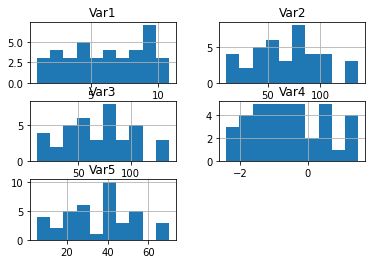

In [5]:
df.hist()
plt.show()

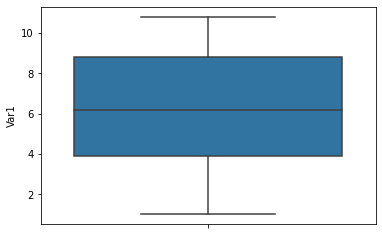

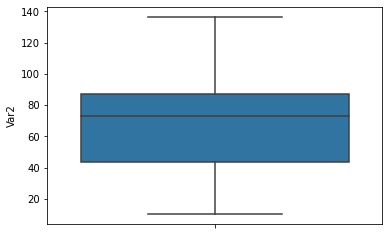

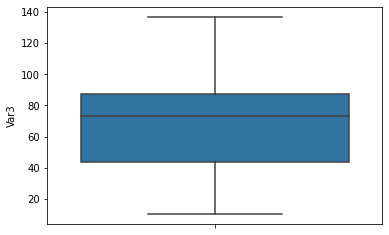

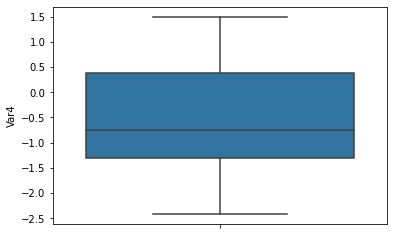

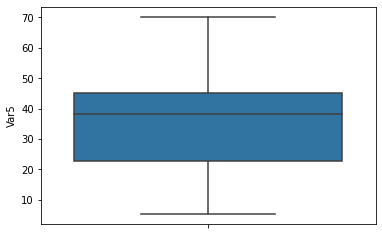

In [6]:
for var in df:
    sns.boxplot(y=var,data=df)
    plt.show()


3. ¿Cuál es la evolución de la inertia en función de K? Obtén una representación gráfica.

In [7]:
sc = StandardScaler()

X = sc.fit_transform(df)

In [8]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

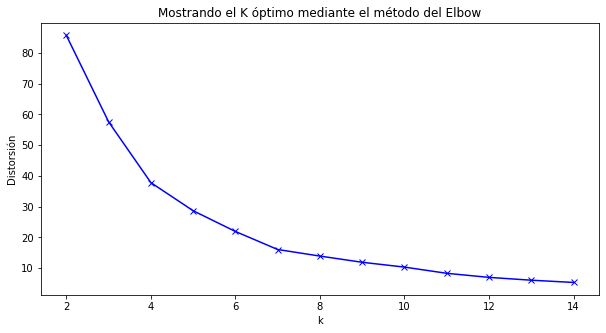

In [9]:
# Representa gráficamente la evolución de la distorsión en función de K
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
scores = list()
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
    del(kmeans)

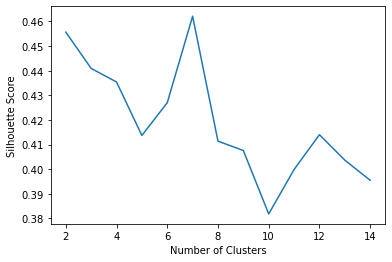

In [12]:
plt.plot(list(range(2, 15)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

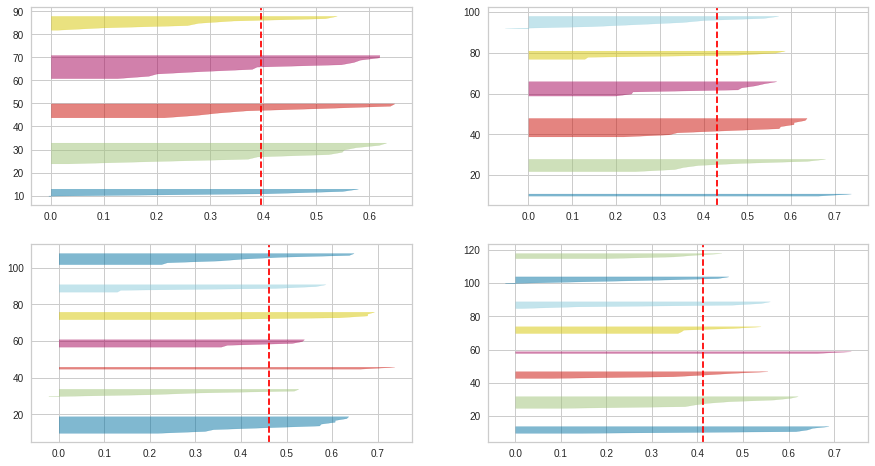

In [25]:
# from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
%matplotlib inline


# Generamos una vista de los distintos Silhouette score en función de K
# Genera un subplot por cada uno de los clústeres generados
# Genera scores para 3, 4, 5 y 6 Ks

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [5, 6, 7, 8]:
    # Creamos una instancia del modelo K-Means en función del valor de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-3, 2)
    # Creamos una instancia de "SilhouetteVisualizer" con la instancia KMeans anterior
    # Alimentamos el visualizador
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

4. ¿Cuál es el número óptimo de clusters que obtienes según el método del Elbow y el método del Silhouette Score?


En el método Elbow, el k óptimo sería 7.

En el método silhouette sería 7.

5. Una vez optenido el valor óptimo de K, genera un modelo K-means y entrénalo con los datos anteriores-

In [14]:
k=7
kmeans = KMeans(n_clusters=k)

In [15]:
y_pred = kmeans.fit_predict(X)

In [16]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.12205274 -0.73333108 -0.7365152   1.14031053 -0.74855345]
 [ 1.36374264  1.29521131  1.29643137 -0.43551815  1.30097217]
 [ 0.72433284  0.31136825  0.31448672 -1.11736703  0.32630561]
 [-0.0372114   0.47618732  0.47279815  1.2154971   0.45989558]
 [ 1.16976439  1.97921045  1.97456095  1.66935054  1.95676635]
 [-1.49564048 -1.59672943 -1.59691122  0.06293251 -1.59748827]
 [-0.44672104 -0.61125629 -0.61042924 -0.29730581 -0.60724556]]


/tmp/ipykernel_13124/140403852.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


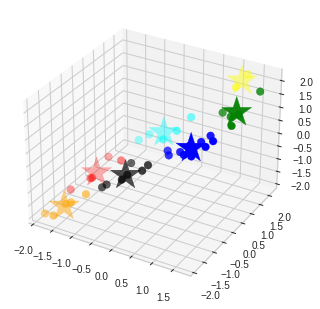

In [17]:
from mpl_toolkits.mplot3d import Axes3D
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow','orange','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

6. Invéntate diversas predicciones para saber en qué clúster se asigna.

In [48]:
X_new = np.array([
    [ 0.23579503,  0.58141796,  0.57928372,  0.76582014,  0.5711387 ],
    [ 0.8105454 ,  0.14401351,  0.14884421, -1.73134252,  0.16717637],
    [ 1.13384249,  0.57507876,  0.57938511, -1.54278601,  0.59569568],
    [ 1.09792059,  1.81122178,  1.80716246,  1.45757293,  1.79162065],
    [ 1.67267096,  1.84925695,  1.84904345,  0.07910694,  1.84810171]
])

In [49]:
kmeans.predict(X_new)


array([3, 2, 2, 4, 1], dtype=int32)